# The $\Phi$  discs and primes as diamonds

The Power of eigenfunctions


## Golden_Ratio_and_mod_13_structure

https://www.youtube.com/watch?v=NY5tgKBtLQ0

$$ T_o  = \frac{1}{2}(1+\sqrt{5})$$

And we have as eigenfunction for the discrete time index for the selected $T_o$:

$$ \tau = e^{\frac{2\pi i}{T_o}}$$



$$\delta[0]=\delta_0 =\frac{1}{T_o}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_{mod} \\
                     0\space for \space n > 0 \space mod\space T_{mod} \\
       \end{cases}$$

$$r[-1]=0$$


$$r[n] = r[n-1] + \delta[n] $$


Time evolves, and becomes interested in modular shapes and in closed loops:

$$\hat n[n] =r[n]·\tau^{n}$$







In [77]:
#

In [78]:
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [79]:
# 
#This one is still dummy but wont crash the pc.
#https://stackoverflow.com/questions/46460127/efficiently-finding-prime-numbers-in-python
primes_list_path='primes.csv'
# import primes list as a numpy array
primes_list=pd.read_csv(primes_list_path)
#primes_list=np.array(primes_list.values,dtype=int)
batch_size =13*130
start_index=0
data = pd.read_csv('mod_37_cycle_data.csv')
basic_map = pd.read_csv('basic_map2.csv')
data.set_index('n', inplace=True)
basic_map.set_index('X', inplace=True)
S = np.array(data.S[start_index:batch_size].values)



In [80]:
df=primes_list

def isPrime(N):
    if df[df.eq(N).all(1)].values !=0:
        answer =   True 
    else:
        answer =   False
            
    return answer


In [81]:
isPrime(13)

True

In [82]:
M=37
mod=13
T_o=0.5*(1+np.sqrt(5))
start_index = 50000
batch_size =13*26
input=S[start_index:start_index+batch_size]



def get_strange_wheel(input,M,mod,T_o,start_index,batch_size,final_title,size_1,size_2):

    r_time_v   =np.zeros(input.size,dtype=float)
    zeta_v     =np.zeros(input.size,dtype=complex)
    cplx_index =np.zeros(input.size,dtype=complex)
    n_mod      =np.zeros(input.size,dtype=int)
    X_color = cm.get_cmap('hsv', mod)
    ff=1/T_o**2
    zeta       =np.exp(1j*2*np.pi/(np.max(S)+1))
    delta      = 1/T_o
    w_o        = 2*np.pi/T_o
    plt.figure(figsize=(13,13))
    plt.rcParams.update({
            "lines.color": "black",
            "patch.edgecolor": "black",
            "text.color": "black",
            "axes.facecolor": "black",
            "axes.edgecolor": "black",
            "axes.labelcolor": "black",
            "xtick.color": "black",
            "ytick.color": "black",
            "grid.color": "black",
            "figure.facecolor": "black",
            "figure.edgecolor": "black",
            "savefig.facecolor": "black",
            "savefig.edgecolor": "black"})

    zeta       =np.exp(1j*2*np.pi/M)
    for n in np.arange(input.size):
        n_mod[n]=n%T_o
        if n_mod[n]==0:
            r_time_v[n]=r_time_v[n-1]+delta
        else:
            r_time_v[n]=r_time_v[n-1]
        cplx_index[n]=r_time_v[n]*np.exp(1j*w_o*n)
        plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%mod),s=size_1)
        plt.text(cplx_index[n].real-2*ff,cplx_index[n].imag,str(n%mod),color=X_color(n%mod),fontsize=5)
        if isPrime(n):
          plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(n%mod),s=size_2,marker='d')
          plt.text(cplx_index[n].real+2*ff,cplx_index[n].imag,str(n),color=X_color(n%mod),fontsize=13)
          #plt.text(cplx_index[n].real,cplx_index[n].imag+2*ff,str(n%mod),color='gray',fontsize=7)
        #plt.savefig('mod_333_wheel_golden_ratio_'+str(n)+'.png')
        
    return cplx_index,zeta_v,n_mod,r_time_v

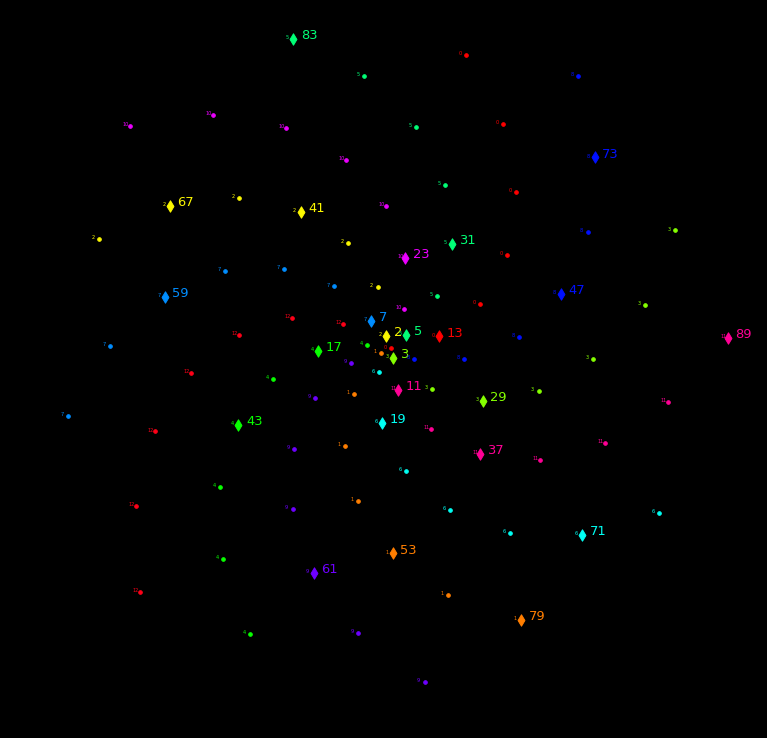

In [87]:
M=13
mod=13
#T_o=6*2+1
T_o=0.5*(1+np.sqrt(5))
start_index = 0
batch_size =13*7
input=S[start_index:start_index+batch_size]
final_title = 'mod_13_and_fibonacci_smaller_cutsst.png' 
cplx_index,zeta_v,n_mod,r_time_v=get_strange_wheel(input,M,mod,T_o,start_index,batch_size,final_title,13,13*5)

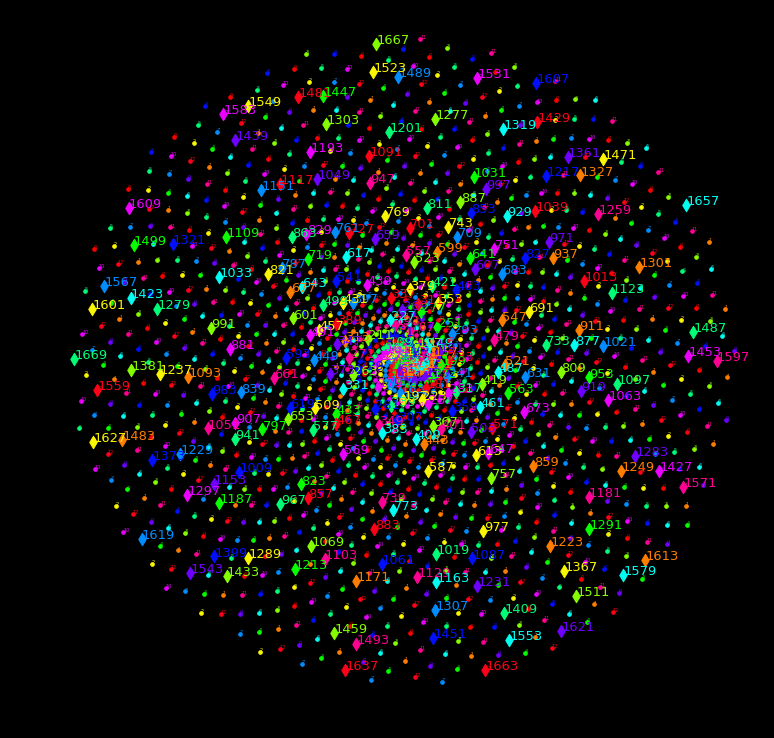

In [84]:
M=13
mod=13
#T_o=6*2+1
T_o=0.5*(1+np.sqrt(5))
start_index = 0
batch_size =13*130
input=S[start_index:start_index+batch_size]
final_title = 'mod_13_and_fibonacci_smaller_cut.png' 
cplx_index,zeta_v,n_mod,r_time_v=get_strange_wheel(input,M,mod,T_o,start_index,batch_size,final_title,13,13*6)